In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
os.chdir('D:\Practical Time Series')

In [3]:
data = pd.read_csv('datasets/WDI_csv/WDIData.csv')

In [4]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


In [5]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (397056, 62)


In [6]:
nb_indicators = data['Indicator Name'].unique().shape[0]
print('Unique number of indicators:', nb_indicators)

Unique number of indicators: 1504


In [7]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [8]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [9]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


In [10]:
central_govt_debt['2010'].describe()

count     93.000000
mean      52.894412
std       30.866372
min        0.519274
25%       28.030110
50%       49.559823
75%       75.289093
max      168.474953
Name: 2010, dtype: float64

In [11]:
military_exp['2010'].describe()

count    194.000000
mean       1.958123
std        1.370594
min        0.000000
25%        1.120302
50%        1.606592
75%        2.594417
max        8.588373
Name: 2010, dtype: float64

In [12]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [13]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]

In [14]:
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)

In [15]:
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [16]:
data_to_plot.head(10)

,central_govt_debt,military_exp
AFG,NaN,1.897473
AGO,NaN,4.244884
ALB,NaN,1.558592
ARB,NaN,5.122879
ARE,NaN,6.119468
ARG,NaN,0.814878
ARM,NaN,4.265646
ATG,75.289093,NaN
AUS,29.356946,1.951809
AUT,79.408304,0.824770


In [17]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [18]:
data_to_plot.head()

,central_govt_debt,military_exp
AUS,29.356946,1.951809
AUT,79.408304,0.824770
AZE,6.385576,2.791004
BEL,7.022605,1.084631
BGR,21.286254,1.765384


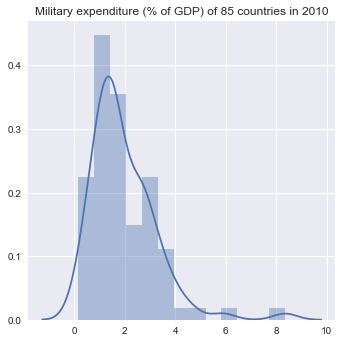

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')
plt.savefig('plots/ch1/B07887_01_01.png', format='png', dpi=300)

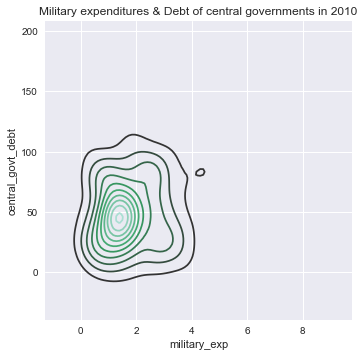

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')
plt.savefig('plots/ch1/B07887_01_02.png', format='png', dpi=300)

In [21]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [22]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

In [23]:
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]

In [24]:
data_us = data_us.iloc[index0:index1+1,:]

In [25]:
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

In [26]:
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1960,NaN,NaN
1961,NaN,NaN
1962,NaN,NaN
1963,NaN,NaN
1964,NaN,NaN
1965,NaN,NaN
1966,NaN,NaN
1967,NaN,NaN
1968,NaN,NaN
1969,NaN,NaN


In [27]:
#There are null rows for several years possibly due to unavailability of data for these years
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (23, 2)


In [31]:
#First 20 rows of data_us after dropping rows with missing values
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1988,5.57993,42.0258
1989,5.37472,43.1439
1990,5.12025,45.3772
1991,4.53985,48.633
1992,4.66626,50.6016
1993,4.32693,50.1657
1994,3.94129,49.3475
1995,3.63849,49.2366
1996,3.35074,46.7174
1997,3.2099,43.2997


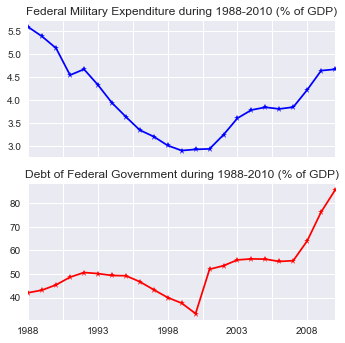

In [28]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])
plt.savefig('plots/ch1/B07887_01_03.png', format='png', dpi=300)

In [29]:
chn = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='CHN'),index0:index1+1
             ]
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)

usa = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='USA'),index0:index1+1
             ]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)

ind = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='IND'),index0:index1+1
             ]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)

gbr = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='GBR'),index0:index1+1
             ]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

C:\Users\avpal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


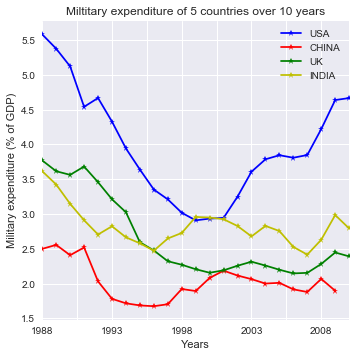

In [30]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA','RUSSIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')
plt.savefig('plots/ch1/B07887_01_04.png', format='png', dpi=300)